In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

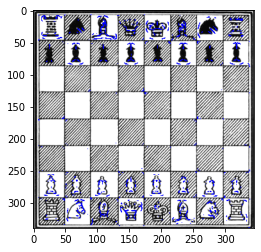

In [3]:
img = cv2.imread('./chess.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# TODO: Understand this
# ksize determines which corners get detected, a low value will result in a lot of corners detected
# the returning `dst` is an image in floating point format. Each value in this image represents a 
# score for the corresponding pixel in the source image. High score indicates corner, 
# and vice versa.
dst = cv2.cornerHarris(gray, blockSize=2, ksize=23, k=0.04)
# Filter out the corner with high enough score
img[dst > 0.01 * dst.max()] = [0, 0, 255]
plt.imshow(img)

The problem with Corner Harris algorithm is, as the image is resized, the list of corners detected might change. We might gain some and lose some corner.

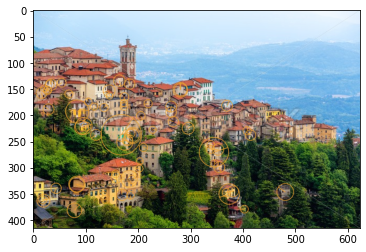

In [4]:
img = cv2.imread('./varese.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

surf = cv2.xfeatures2d.SURF_create(hessianThreshold=8000)
keypoints, descriptors = surf.detectAndCompute(gray, None)

cv2.drawKeypoints(img, keypoints, img, (51, 163, 236), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [5]:
cv2.xfeatures2d.SURF_create?

Docstring:
SURF_create([, hessianThreshold[, nOctaves[, nOctaveLayers[, extended[, upright]]]]]) -> retval
.   @param hessianThreshold Threshold for hessian keypoint detector used in SURF.
.       @param nOctaves Number of pyramid octaves the keypoint detector will use.
.       @param nOctaveLayers Number of octave layers within each octave.
.       @param extended Extended descriptor flag (true - use extended 128-element descriptors; false - use
.       64-element descriptors).
.       @param upright Up-right or rotated features flag (true - do not compute orientation of features;
.       false - compute orientation).
Type:      builtin_function_or_method


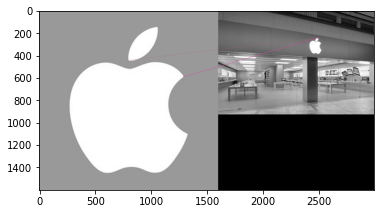

In [6]:
img0 = cv2.imread('./logo_white.jpeg', cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread('./logo_2.jpeg', cv2.IMREAD_GRAYSCALE)

# Perform orb feature detection and description
orb = cv2.ORB_create()
kp0, des0 = orb.detectAndCompute(img0, None)
kp1, des1 = orb.detectAndCompute(img1, None)

# Perform brute-force matching
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des0, des1)

# Sort the matches by distance
matches = sorted(matches, key=lambda x:x.distance)

# Draw the best 25 matches
img_matches = cv2.drawMatches(img0, kp0, img1, kp1, matches1to2=matches[:25], outImg=img1, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img_matches)

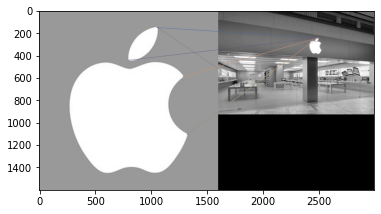

In [7]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
pairs_of_matches = bf.knnMatch(des0, des1, k=2)
pairs_of_matches = sorted(pairs_of_matches, key=lambda x:x[0].distance)

img_pairs_of_matches = cv2.drawMatchesKnn(img0, kp0, img1, kp1, pairs_of_matches[:25], img1, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

cv2.imwrite('match.png', img_pairs_of_matches)
plt.imshow(img_pairs_of_matches)

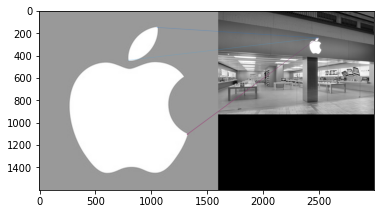

In [8]:
# in this case, no match pass the test
matches = [x[0] for x in pairs_of_matches if len(x) > 1 and x[0].distance < 0.9 * x[1].distance]

img_matches = cv2.drawMatches(img0, kp0, img1, kp1, matches[:25], img1, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
cv2.imwrite('match_knn.png', img_matches)
plt.imshow(img_matches)

### FLANN Matchers


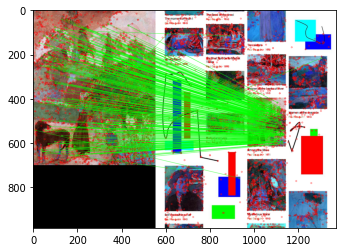

In [9]:
img0 = cv2.imread('./painting.jpeg', cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread('./painting_noise.jpeg', cv2.IMREAD_GRAYSCALE)

# Perform SIFT feature detection and description
sift = cv2.xfeatures2d.SIFT_create()
kp0, des0 = sift.detectAndCompute(img0, None)
kp1, des1 = sift.detectAndCompute(img1, None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

# TODO: What is FLANN exactly?
# Perform FLANN-based matching
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des0, des1, k=2)

mask_matches = [[0, 0] for i in range(len(matches))]
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        mask_matches[i] = [1, 0]

img_matches = cv2.drawMatchesKnn(img0, kp0, img1, kp1, matches, None, matchColor=(0, 255, 0), singlePointColor=(255, 0, 0), matchesMask=mask_matches, flags=0)

plt.imshow(img_matches)
